<a href="https://colab.research.google.com/github/sahil-raval/Second-ML-Project/blob/master/Second_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identifying missing values in a dataframe

In [2]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,, 8.0
10.0,11.0, 12.0,'''
csv_data

'A,B,C,D\n1.0,2.0,3.0,4.0\n5.0,6.0,, 8.0\n10.0,11.0, 12.0,'

In [3]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


Checking the missing values

In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

Converting a data frame to a numpy array

In [5]:
import numpy as np
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])


Eliminating the missing values

In [6]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


removing the columns (axis=1) with atleast one NA

In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


removing the rows (axis=0) with atleast one NA

In [8]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


Handling Categorical data

In [9]:
import pandas as pd
df = pd.DataFrame([
    ['green','M',10.1,'class2'],
    ['red','L',13.5,'class1'],
    ['blue','XL',15.3,'class2']
])
df

,0,1,2,3
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


naming the columns


In [10]:
df.columns = ['color','size','price','classLabel']
df

,color,size,price,classLabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


Mapping ordinal features

In [11]:
size_mapping={'XL':3,
              'L':2,
              'M':1}
size_mapping

{'XL': 3, 'L': 2, 'M': 1}

In [12]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classLabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


Encoding class labels

In [13]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classLabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classLabel'] = df['classLabel'].map(class_mapping)
df

,color,size,price,classLabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


Now we will inverse the mapping values

In [15]:
inv_class_mapping = {idx: label for label, idx in class_mapping.items()}
df['classLabel'] = df['classLabel'].map(inv_class_mapping)
df


,color,size,price,classLabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


Performing one-hot encoding  on nominal features

In [16]:
from sklearn.preprocessing import LabelEncoder

X = df[['color','size', 'price']].values
color_le =LabelEncoder()
X[:,0]= color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

Partitioning a dataset into a seperate training and test datasets

Load the wine data and relabeling it with other column names

In [17]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Performing spliting

In [19]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X,y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0, stratify = y)


In [21]:
X_train, X_test, y_train,y_test

(array([[1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
         1.235e+03],
        [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
         1.285e+03],
        ...,
        [1.388e+01, 5.040e+00, 2.230e+00, ..., 5.800e-01, 1.330e+00,
         4.150e+02],
        [1.196e+01, 1.090e+00, 2.300e+00, ..., 9.900e-01, 3.130e+00,
         8.860e+02],
        [1.270e+01, 3.870e+00, 2.400e+00, ..., 1.190e+00, 3.130e+00,
         4.630e+02]]),
 array([[1.377e+01, 1.900e+00, 2.680e+00, 1.710e+01, 1.150e+02, 3.000e+00,
         2.790e+00, 3.900e-01, 1.680e+00, 6.300e+00, 1.130e+00, 2.930e+00,
         1.375e+03],
        [1.217e+01, 1.450e+00, 2.530e+00, 1.900e+01, 1.040e+02, 1.890e+00,
         1.750e+00, 4.500e-01, 1.030e+00, 2.950e+00, 1.450e+00, 2.230e+00,
         3.550e+02],
        [1.439e+01, 1.870e+00, 2.450e+00, 1.460e+01, 9.600e+01, 2.500e+00,
         2.520e+00, 3.000e-0

Bringing features onto the same scale

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [23]:
X_train_norm

array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
        0.19400856],
       [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
        0.68259629],
       [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
        0.71825963],
       ...,
       [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
        0.09771755],
       [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
        0.43366619],
       [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
        0.13195435]])

In [24]:
X_test_norm

array([[ 0.69005848,  0.22924901,  0.64052288,  0.30645161,  0.55555556,
         0.69655172,  0.51687764,  0.52      ,  0.39873418,  0.40497336,
         0.69148936,  0.60805861,  0.78245364],
       [ 0.22222222,  0.14031621,  0.54248366,  0.40860215,  0.41975309,
         0.3137931 ,  0.29746835,  0.64      ,  0.19303797,  0.10746004,
         1.03191489,  0.35164835,  0.05492154],
       [ 0.87134503,  0.22332016,  0.49019608,  0.17204301,  0.32098765,
         0.52413793,  0.45991561,  0.34      ,  0.49367089,  0.31172291,
         0.57446809,  0.84615385,  0.72182596],
       [ 0.52339181,  0.2055336 ,  0.2875817 , -0.01075269,  0.37037037,
         0.57586207,  0.51054852,  0.26      ,  0.2721519 ,  0.23445826,
         0.60638298,  0.78021978,  0.55064194],
       [ 0.28070175,  0.06521739,  0.26143791,  0.38172043,  0.22222222,
         0.87586207,  0.71940928,  0.22      ,  0.48417722,  0.24511545,
         0.59574468,  0.54945055,  0.2724679 ],
       [ 0.30409357,  0.452569

In [25]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.474722,0.318931,0.447660,0.451700,0.359120,0.463737,0.363737,0.476129,0.386357,0.297478,0.504461,0.494269,0.340102
std,0.241728,0.232006,0.175925,0.179599,0.174232,0.212880,0.215945,0.243346,0.187502,0.210451,0.235825,0.254857,0.233033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278509,0.173913,0.351307,0.327957,0.222222,0.282759,0.191983,0.280000,0.265032,0.129663,0.329787,0.266484,0.158524
50%,0.483918,0.218379,0.437908,0.435484,0.339506,0.493103,0.385021,0.420000,0.371835,0.267318,0.515957,0.565934,0.282097
75%,0.668129,0.480237,0.576797,0.553763,0.447531,0.639655,0.542722,0.625000,0.491297,0.396092,0.680851,0.695971,0.539943
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [27]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,6.879354e-15,1.969751e-16,3.797869e-15,2.748697e-16,-3.250088e-16,1.651904e-15,1.526557e-16,-1.195280e-15,1.899019e-15,-1.608033e-15,-5.998786e-16,8.720623e-16,-1.405686e-16
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-1.971837e+00,-1.380243e+00,-2.554934e+00,-2.525252e+00,-2.069521e+00,-2.187238e+00,-1.691226e+00,-1.964528e+00,-2.068907e+00,-1.419256e+00,-2.147813e+00,-1.947267e+00,-1.465378e+00
25%,-8.150037e-01,-6.275963e-01,-5.499141e-01,-6.917901e-01,-7.889079e-01,-8.535947e-01,-7.985839e-01,-8.092365e-01,-6.496852e-01,-8.006399e-01,-7.436984e-01,-8.974047e-01,-7.823560e-01
50%,3.819870e-02,-4.351583e-01,-5.565323e-02,-9.065504e-02,-1.130290e-01,1.385058e-01,9.896271e-02,-2.315907e-01,-7.775997e-02,-1.438903e-01,4.894675e-02,2.823374e-01,-2.499217e-01
75%,8.033481e-01,6.980880e-01,7.370293e-01,5.705935e-01,5.094911e-01,8.297234e-01,8.322044e-01,6.142478e-01,5.619490e-01,4.704883e-01,7.510038e-01,7.946413e-01,8.610452e-01
max,2.181832e+00,2.947475e+00,3.152379e+00,3.065304e+00,3.693237e+00,2.529306e+00,2.958360e+00,2.161513e+00,3.286008e+00,3.351712e+00,2.109824e+00,1.992422e+00,2.843268e+00


Sequential Feature Selection Algorithm

In [28]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

Applying the sbs feature selection

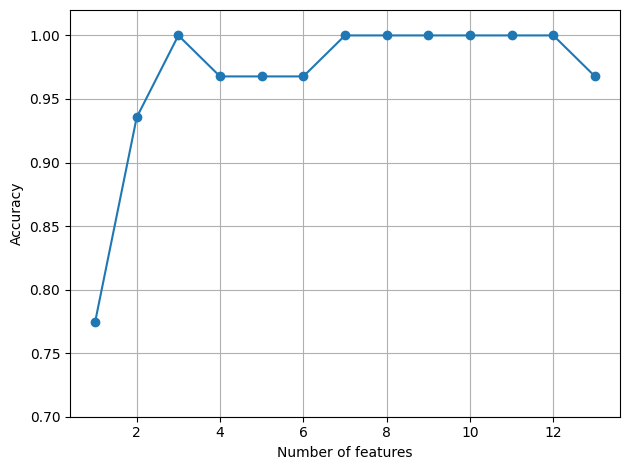

In [29]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

Assessing feature importance with random forests

Build a random forest model

In [30]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


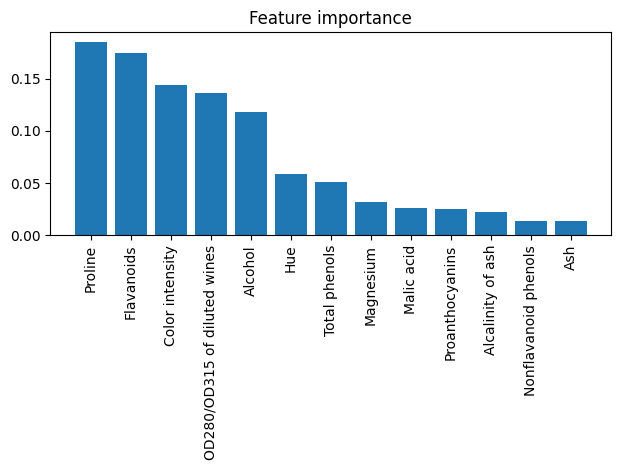

In [31]:

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

Select the top 5 features

In [32]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [33]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
